## Geocoding

In [24]:
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
import contextily as ctx

import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter


### Geocoding Single Address 

In [25]:

locator = Nominatim(user_agent="myGeocoder")
location = locator.geocode("Champ de Mars, Paris, France")

In [26]:
print(location.address)
print("Latitude = {}, Longitude = {}".format(location.latitude, location.longitude))


Champ de Mars, Rue de Monttessuy, Quartier du Gros-Caillou, Paris 7e Arrondissement, Paris, Île-de-France, France métropolitaine, 75007, France
Latitude = 48.85614465, Longitude = 2.297820393322227


In [27]:
location.point

Point(48.85614465, 2.297820393322227, 0.0)

### Geocoding with Pandas DataFrame

In [28]:
df = pd.read_csv("data/addresses.csv")
df.head()

,Nr,Address1,Address3,Address4,Address5
0,102,Karlaplan 13,115 20,STOCKHOLM,Stockholms län
1,104,Nybrogatan 47,114 39,STOCKHOLM,Stockholms län
2,106,Karlavägen 100 A,115 26,STOCKHOLM,Stockholms län
3,110,Hötorgshallen,111 57,STOCKHOLM,Stockholms län
4,113,Drottninggatan 45,111 21,STOCKHOLM,Stockholms län


In [6]:
df['ADDRESS'] = df['Address1'].astype(str) + ',' + \
                df['Address3'] + ',' + \
                df['Address4'] + ',' + \
                df['Address5'] + ',' + ' Sweden'   

df.head()

,Nr,Address1,Address3,Address4,Address5,ADDRESS
0,102,Karlaplan 13,115 20,STOCKHOLM,Stockholms län,"Karlaplan 13,115 20,STOCKHOLM,Stockholms län, ..."
1,104,Nybrogatan 47,114 39,STOCKHOLM,Stockholms län,"Nybrogatan 47,114 39,STOCKHOLM,Stockholms län,..."
2,106,Karlavägen 100 A,115 26,STOCKHOLM,Stockholms län,"Karlavägen 100 A,115 26,STOCKHOLM,Stockholms l..."
3,110,Hötorgshallen,111 57,STOCKHOLM,Stockholms län,"Hötorgshallen,111 57,STOCKHOLM,Stockholms län,..."
4,113,Drottninggatan 45,111 21,STOCKHOLM,Stockholms län,"Drottninggatan 45,111 21,STOCKHOLM,Stockholms ..."


In [7]:
df[["Nr", "ADDRESS"]].to_csv("address_with_col.csv")

In [8]:
df.head()

,Nr,Address1,Address3,Address4,Address5,ADDRESS
0,102,Karlaplan 13,115 20,STOCKHOLM,Stockholms län,"Karlaplan 13,115 20,STOCKHOLM,Stockholms län, ..."
1,104,Nybrogatan 47,114 39,STOCKHOLM,Stockholms län,"Nybrogatan 47,114 39,STOCKHOLM,Stockholms län,..."
2,106,Karlavägen 100 A,115 26,STOCKHOLM,Stockholms län,"Karlavägen 100 A,115 26,STOCKHOLM,Stockholms l..."
3,110,Hötorgshallen,111 57,STOCKHOLM,Stockholms län,"Hötorgshallen,111 57,STOCKHOLM,Stockholms län,..."
4,113,Drottninggatan 45,111 21,STOCKHOLM,Stockholms län,"Drottninggatan 45,111 21,STOCKHOLM,Stockholms ..."


In [9]:
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
df['location'] = df['ADDRESS'].apply(geocode)
df.head()

,Nr,Address1,Address3,Address4,Address5,ADDRESS,location
0,102,Karlaplan 13,115 20,STOCKHOLM,Stockholms län,"Karlaplan 13,115 20,STOCKHOLM,Stockholms län, ...","(13, Karlaplan, Östermalm, Östermalms stadsdel..."
1,104,Nybrogatan 47,114 39,STOCKHOLM,Stockholms län,"Nybrogatan 47,114 39,STOCKHOLM,Stockholms län,...","(47, Nybrogatan, Villastaden, Östermalm, Öster..."
2,106,Karlavägen 100 A,115 26,STOCKHOLM,Stockholms län,"Karlavägen 100 A,115 26,STOCKHOLM,Stockholms l...","(Karlavägen, Östermalm, Östermalms stadsdelsom..."
3,110,Hötorgshallen,111 57,STOCKHOLM,Stockholms län,"Hötorgshallen,111 57,STOCKHOLM,Stockholms län,...","(Hötorgshallen, Hötorget, Klara, Norrmalm, Nor..."
4,113,Drottninggatan 45,111 21,STOCKHOLM,Stockholms län,"Drottninggatan 45,111 21,STOCKHOLM,Stockholms ...","(Drottninggatan, Klara, Norrmalm, Norrmalms st..."


In [10]:
df.location

0     (13, Karlaplan, Östermalm, Östermalms stadsdel...
1     (47, Nybrogatan, Villastaden, Östermalm, Öster...
2     (Karlavägen, Östermalm, Östermalms stadsdelsom...
3     (Hötorgshallen, Hötorget, Klara, Norrmalm, Nor...
4     (Drottninggatan, Klara, Norrmalm, Norrmalms st...
5     (Norrlandsgatan, Klara, Norrmalm, Norrmalms st...
6     (22, Drottninggatan, Klara, Norrmalm, Norrmalm...
7                                                  None
8     (Kungsholmstorg, Kungsholmen, Kungsholmens sta...
9     (118, Lindhagensgatan, Hornsberg, Stadshagen, ...
10    (56, Fleminggatan, Kungsholmen, Kungsholmens s...
11    (92, Odengatan, Atlasområdet, Vasastaden, Norr...
12    (2B, Solnavägen, Röda bergen, Vasastaden, Norr...
13    (58, Odengatan, Sibirien, Vasastaden, Norrmalm...
14    (84, Birger Jarlsgatan, Sibirien, Vasastaden, ...
15    (66, Sveavägen, Norrmalm, Norrmalms stadsdelso...
16    (25, Vasagatan, Klara, Norrmalm, Norrmalms sta...
17    (Götgatan, Skanstull, Södermalm, Södermalm

In [11]:
df['point'] = df['location'].apply(lambda loc: tuple(loc.point) if loc else None)

In [12]:
df['point'][0][0]

59.3388914

In [13]:
df.head()

,Nr,Address1,Address3,Address4,Address5,ADDRESS,location,point
0,102,Karlaplan 13,115 20,STOCKHOLM,Stockholms län,"Karlaplan 13,115 20,STOCKHOLM,Stockholms län, ...","(13, Karlaplan, Östermalm, Östermalms stadsdel...","(59.3388914, 18.0909335, 0.0)"
1,104,Nybrogatan 47,114 39,STOCKHOLM,Stockholms län,"Nybrogatan 47,114 39,STOCKHOLM,Stockholms län,...","(47, Nybrogatan, Villastaden, Östermalm, Öster...","(59.3372072, 18.0790982, 0.0)"
2,106,Karlavägen 100 A,115 26,STOCKHOLM,Stockholms län,"Karlavägen 100 A,115 26,STOCKHOLM,Stockholms l...","(Karlavägen, Östermalm, Östermalms stadsdelsom...","(59.3356727, 18.0991791, 0.0)"
3,110,Hötorgshallen,111 57,STOCKHOLM,Stockholms län,"Hötorgshallen,111 57,STOCKHOLM,Stockholms län,...","(Hötorgshallen, Hötorget, Klara, Norrmalm, Nor...","(59.3343273, 18.0626039, 0.0)"
4,113,Drottninggatan 45,111 21,STOCKHOLM,Stockholms län,"Drottninggatan 45,111 21,STOCKHOLM,Stockholms ...","(Drottninggatan, Klara, Norrmalm, Norrmalms st...","(59.3336068, 18.0616879, 0.0)"


In [14]:
df.dtypes

Nr           int64
Address1    object
Address3    object
Address4    object
Address5    object
ADDRESS     object
location    object
point       object
dtype: object

In [15]:
# split point column into latitude, longitude and altitude columns
df[['latitude', 'longitude', 'altitude']] = pd.DataFrame(df['point'].tolist(), index=df.index)
df.head()

,Nr,Address1,Address3,Address4,Address5,ADDRESS,location,point,latitude,longitude,altitude
0,102,Karlaplan 13,115 20,STOCKHOLM,Stockholms län,"Karlaplan 13,115 20,STOCKHOLM,Stockholms län, ...","(13, Karlaplan, Östermalm, Östermalms stadsdel...","(59.3388914, 18.0909335, 0.0)",59.338891,18.090933,0.0
1,104,Nybrogatan 47,114 39,STOCKHOLM,Stockholms län,"Nybrogatan 47,114 39,STOCKHOLM,Stockholms län,...","(47, Nybrogatan, Villastaden, Östermalm, Öster...","(59.3372072, 18.0790982, 0.0)",59.337207,18.079098,0.0
2,106,Karlavägen 100 A,115 26,STOCKHOLM,Stockholms län,"Karlavägen 100 A,115 26,STOCKHOLM,Stockholms l...","(Karlavägen, Östermalm, Östermalms stadsdelsom...","(59.3356727, 18.0991791, 0.0)",59.335673,18.099179,0.0
3,110,Hötorgshallen,111 57,STOCKHOLM,Stockholms län,"Hötorgshallen,111 57,STOCKHOLM,Stockholms län,...","(Hötorgshallen, Hötorget, Klara, Norrmalm, Nor...","(59.3343273, 18.0626039, 0.0)",59.334327,18.062604,0.0
4,113,Drottninggatan 45,111 21,STOCKHOLM,Stockholms län,"Drottninggatan 45,111 21,STOCKHOLM,Stockholms ...","(Drottninggatan, Klara, Norrmalm, Norrmalms st...","(59.3336068, 18.0616879, 0.0)",59.333607,18.061688,0.0


In [16]:
df.dtypes

Nr             int64
Address1      object
Address3      object
Address4      object
Address5      object
ADDRESS       object
location      object
point         object
latitude     float64
longitude    float64
altitude     float64
dtype: object

In [17]:
df.columns

Index(['Nr', 'Address1', 'Address3', 'Address4', 'Address5', 'ADDRESS',
       'location', 'point', 'latitude', 'longitude', 'altitude'],
      dtype='object')

In [18]:
df = df.drop(['Address1', 'Address3', 'Address4', 'Address5', 'ADDRESS', 'location', 'point'], axis=1)

In [19]:
df.head()

,Nr,latitude,longitude,altitude
0,102,59.338891,18.090933,0.0
1,104,59.337207,18.079098,0.0
2,106,59.335673,18.099179,0.0
3,110,59.334327,18.062604,0.0
4,113,59.333607,18.061688,0.0


In [20]:
df.latitude.isnull().sum()

2

In [21]:
def create_gdf(df, lat, lon, crs):
    gdf = gpd.GeoDataFrame(df, crs=crs, geometry=gpd.points_from_xy(df[lon], df[lat]))
    return gdf

In [22]:
gdf = create_gdf(df, "latitude", "longitude", crs="epsg:4326")
gdf.head()

,Nr,latitude,longitude,altitude,geometry
0,102,59.338891,18.090933,0.0,POINT (18.09093 59.33889)
1,104,59.337207,18.079098,0.0,POINT (18.07910 59.33721)
2,106,59.335673,18.099179,0.0,POINT (18.09918 59.33567)
3,110,59.334327,18.062604,0.0,POINT (18.06260 59.33433)
4,113,59.333607,18.061688,0.0,POINT (18.06169 59.33361)


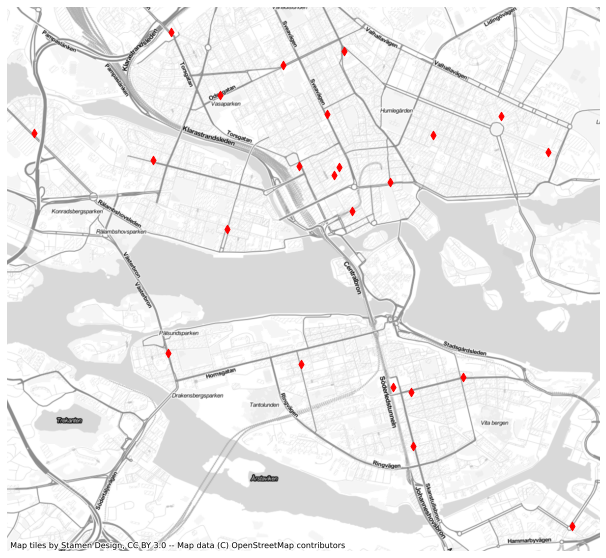

In [23]:
fig, ax = plt.subplots(figsize=(12,10))

gdf.to_crs(epsg=3857).plot(ax=ax, color="red", marker="d")
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)
ax.axis("off")
plt.show()
